In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/KDDTest.csv')

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class,num_learners
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_learners
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


### Since there are no null value
### Lets check if there are any duplicate value

In [ ]:
df.duplicated().sum()

0

### Dataset does not contain any duplicate value

# Outliers

<Figure size 2000x4000 with 0 Axes>

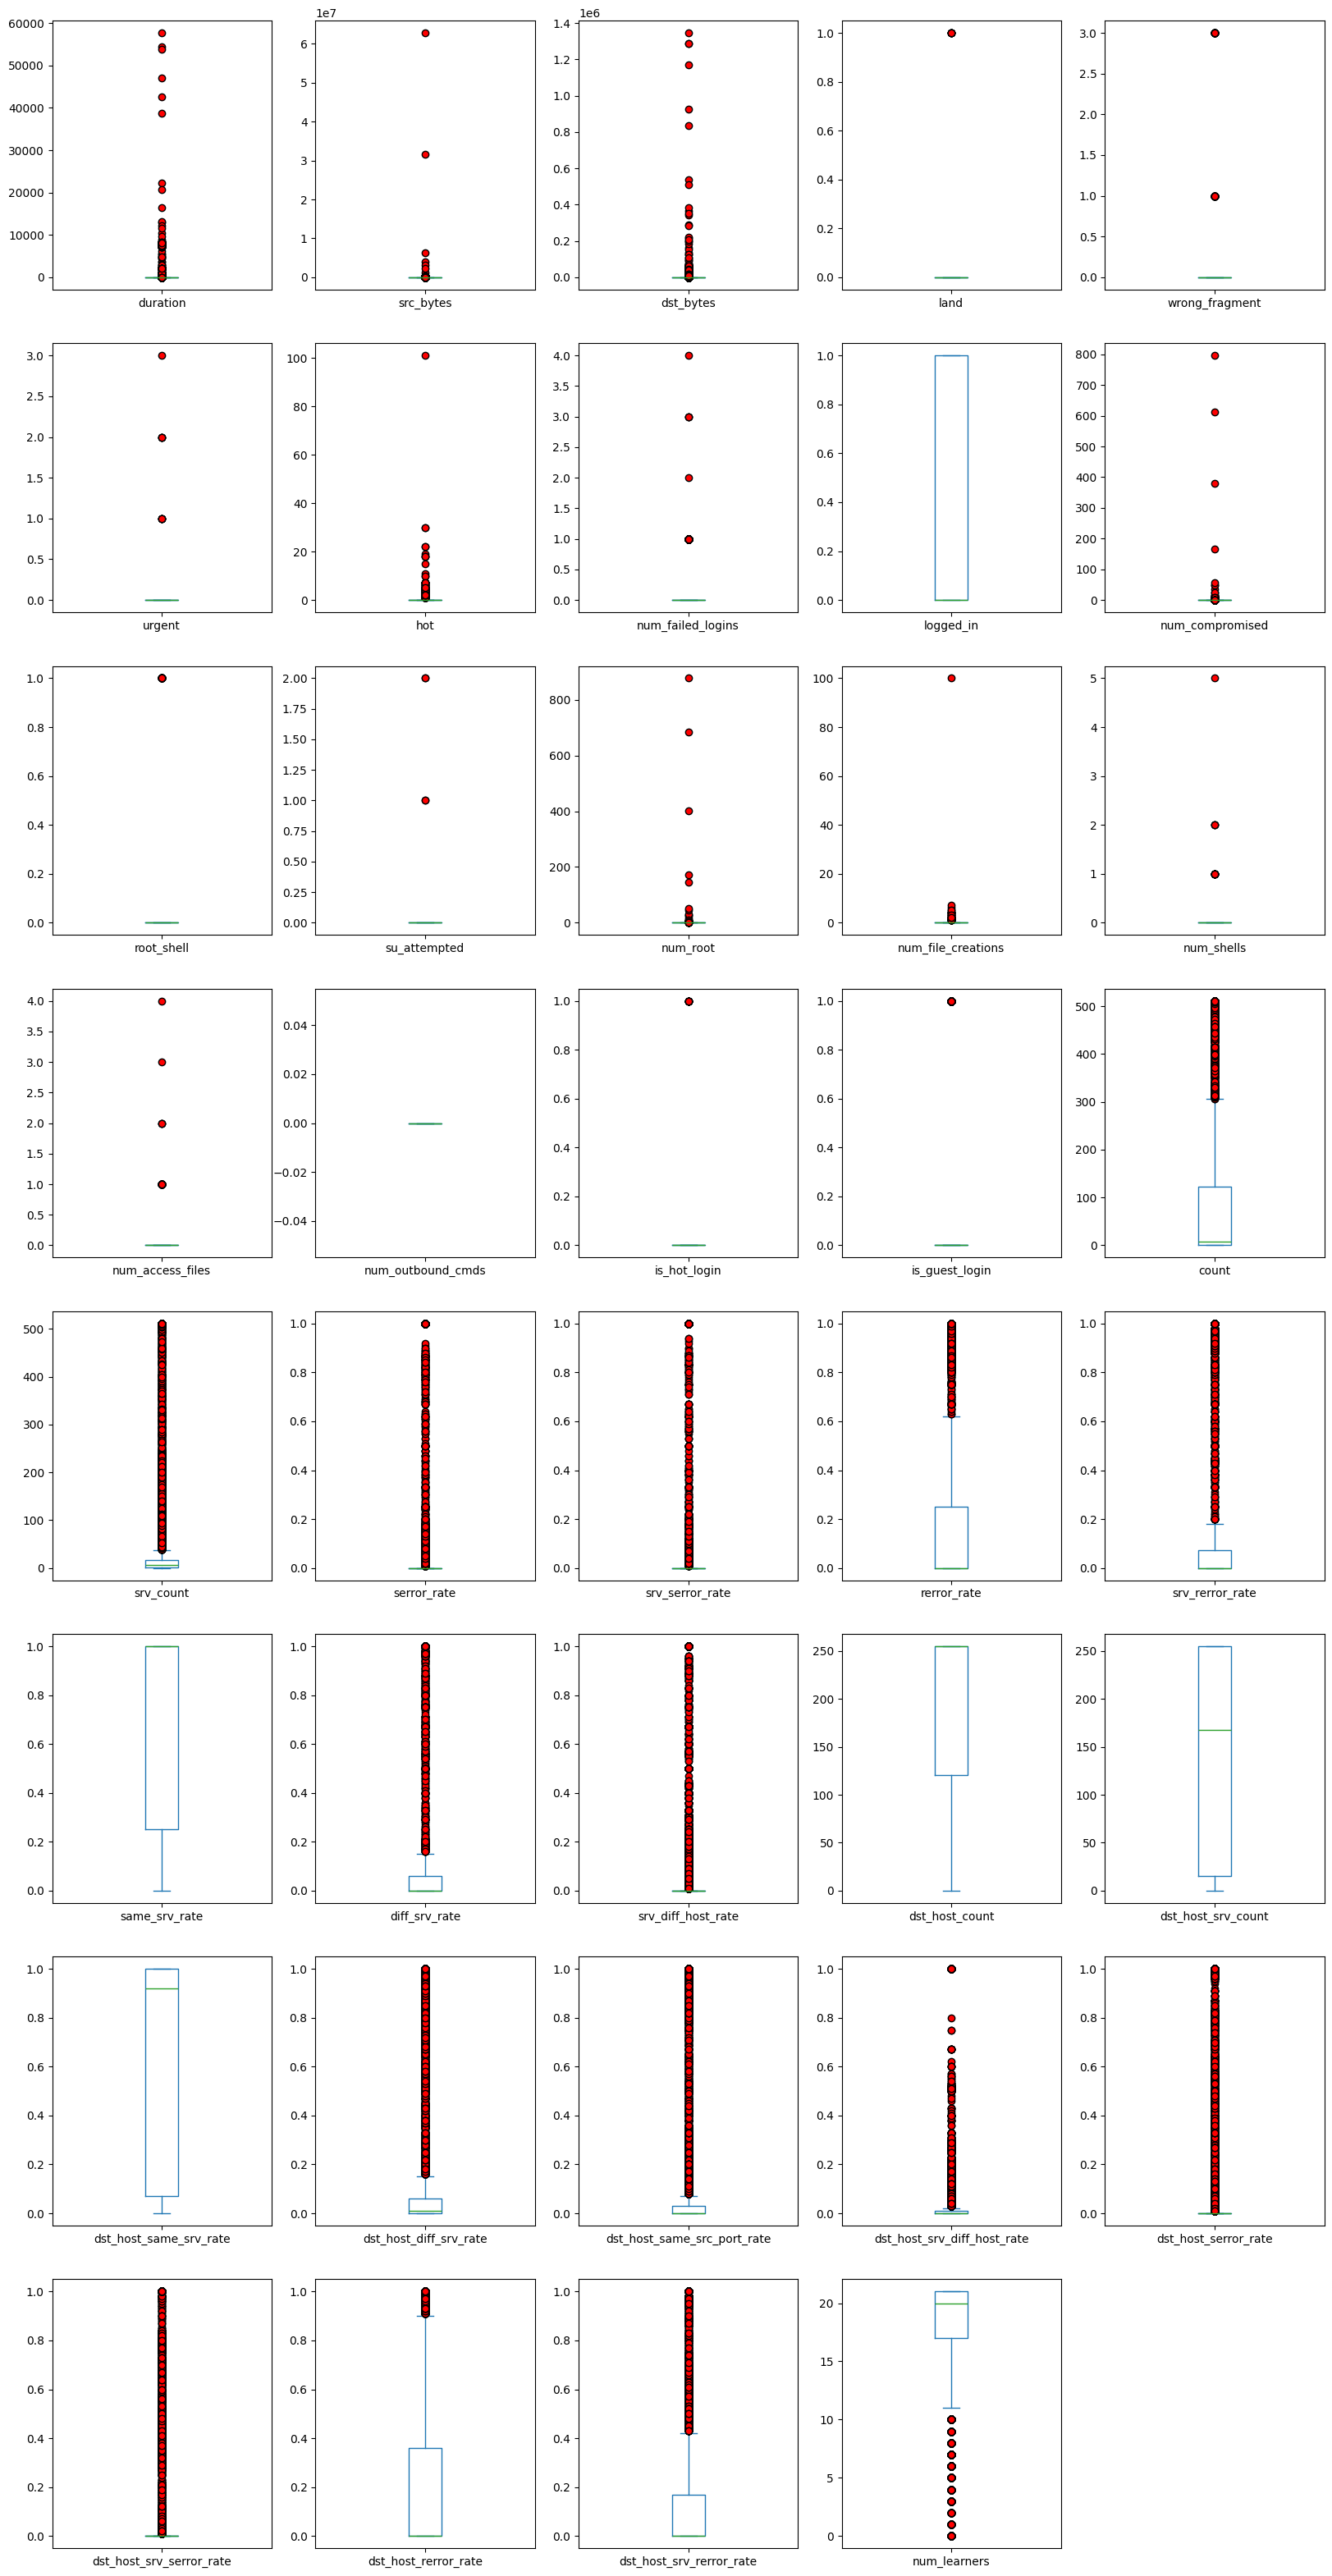

In [ ]:
mark_circle=dict(marker='o',markerfacecolor='red')
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40),flierprops=mark_circle)
plt.show()

# We Have Some Outliers and we will deal with it Later

### Protocol Type

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class,num_learners
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
attack_n = []
for i in df.attack_class :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack_class'] = attack_n

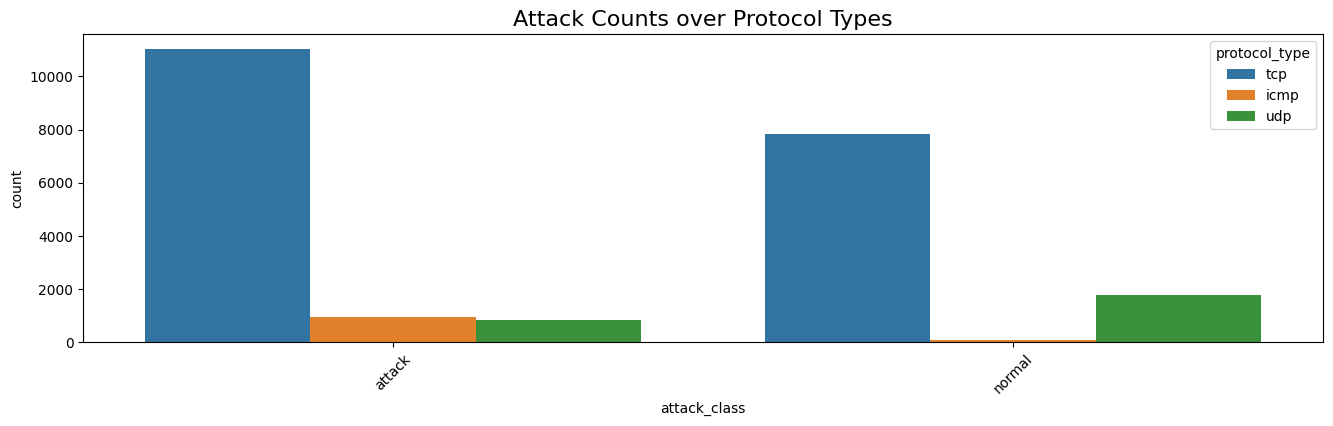

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack_class',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

# We Can See Most Of The Attack Comes from Tcp Protocol then ICMP and lastly UDP

<ipython-input-12-41a583186dc3>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels


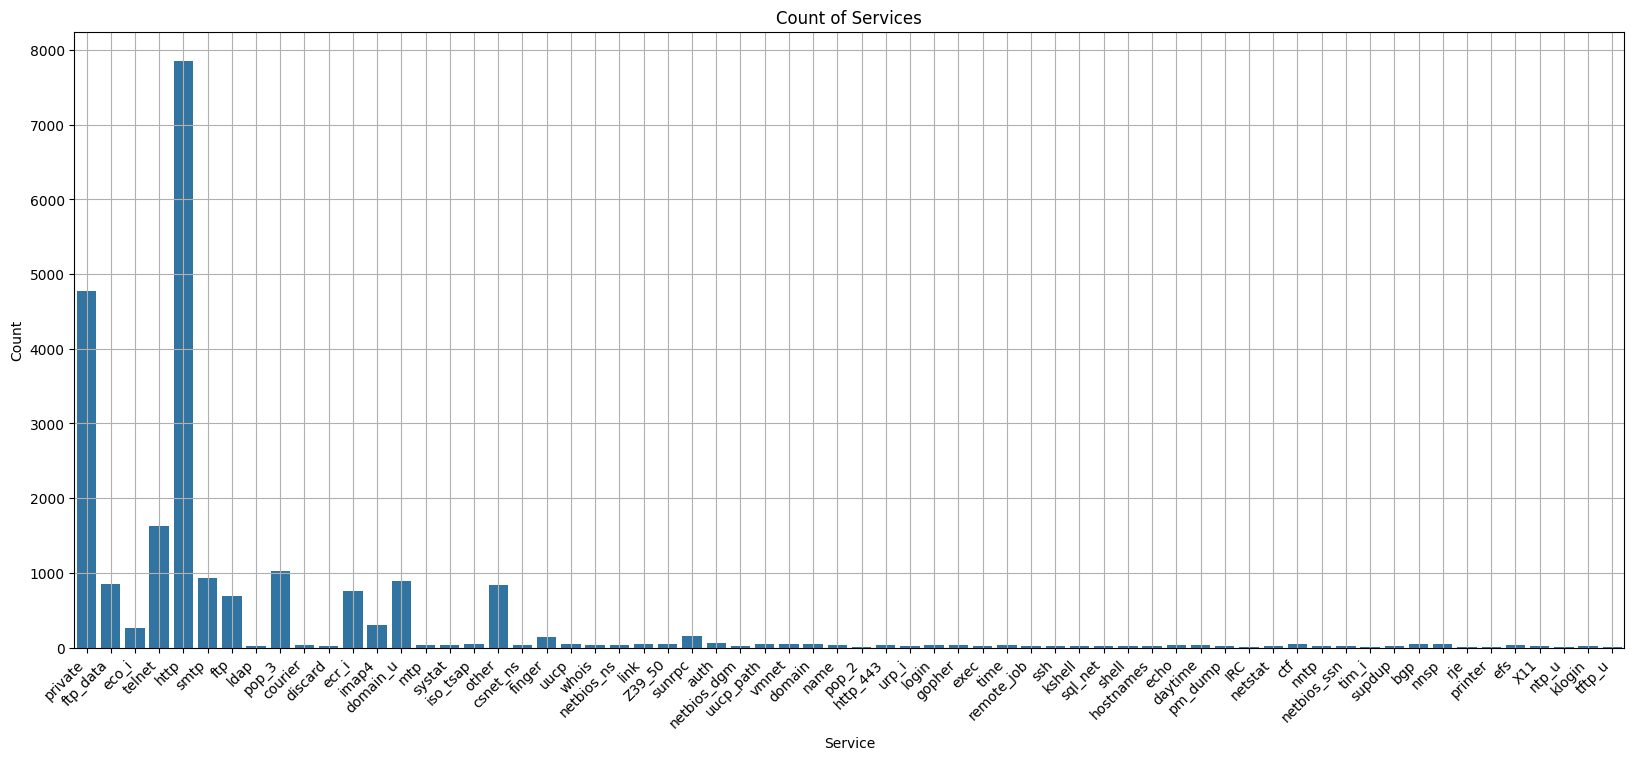

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

### Services most used in general follows as, http,private,domain_u,smtp, ftp,other..

<ipython-input-13-30366f759f56>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


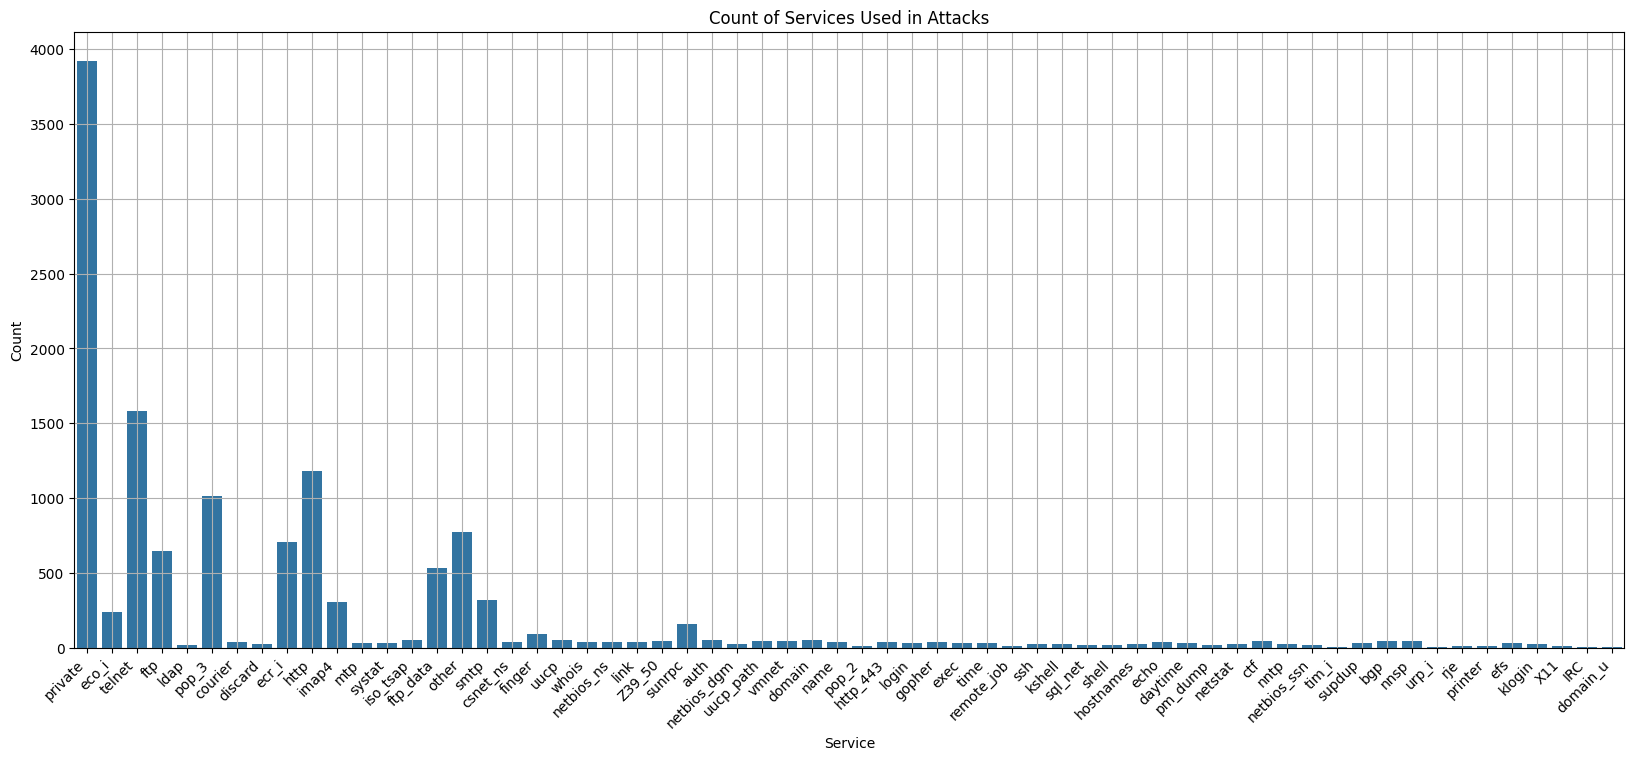

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to only include rows with attack labels
attack_df = df[df['attack_class'] != 'normal']  # 'label' column holds the attack type

# Adjusted figure size and countplot for services used in attacks
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='service', data=attack_df)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Labels and title
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services Used in Attacks')

# Optional: Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


### Here We can See Private Is The Most common Service During an Attack

# Distribution of Attack Types by Guest Login

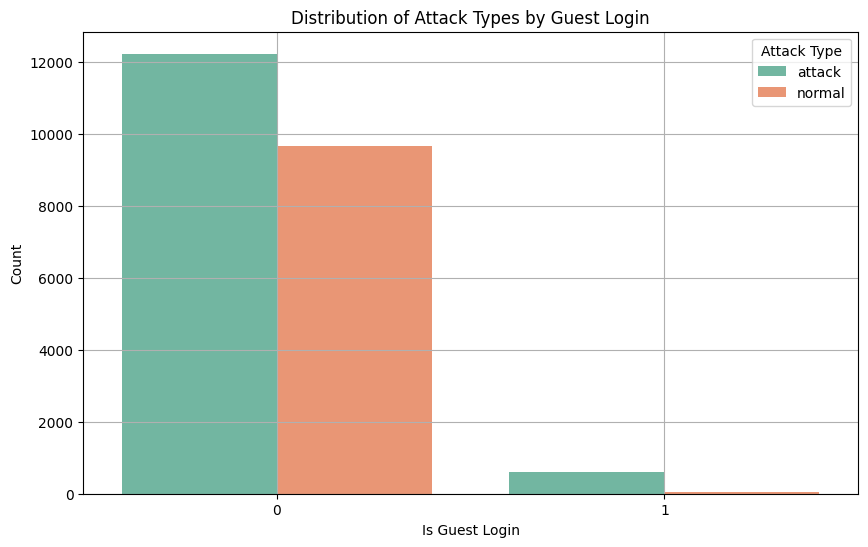

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack_class', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

## Here we can clearly say attack genarally comes when guest are not logged in

<ipython-input-15-8fd59f93d0ea>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


<Figure size 1200x800 with 0 Axes>

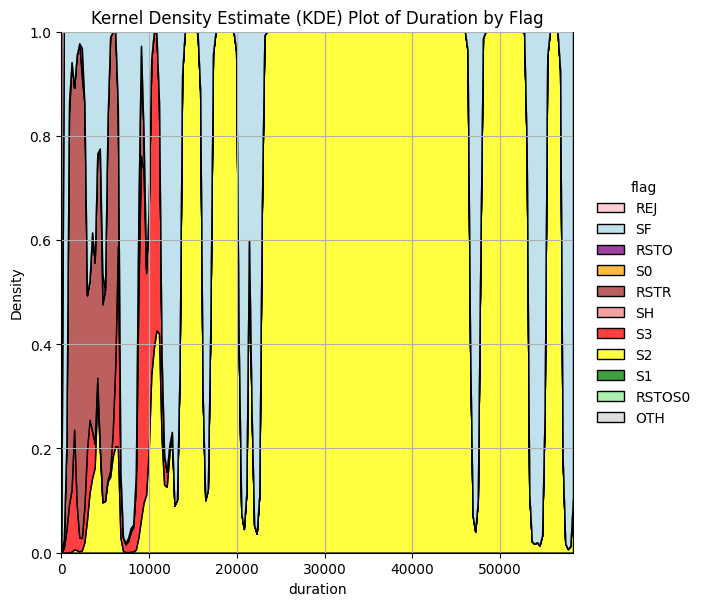

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a color palette for each flag type (you can adjust the colors as needed)
flag_palette = {
    'SF': 'lightblue',  # Successful connection
    'S0': 'orange',     # Symmetric scan
    'S1': 'green',      # SYN scan
    'S2': 'yellow',     # Access scan
    'S3': 'red',        # FIN scan
    'RSTO': 'purple',   # Reset scan
    'REJ': 'pink',      # Reject
    'RSTR': 'brown',    # Reset RST
    #'RSTOS0', 'SH', 'OTH'
    'RSTOS0': 'lightgreen',
    'SH': 'lightcoral',
    'OTH': 'lightgray'
}

# Plotting the KDE plot for 'duration' by 'flag'
plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette=flag_palette,  # Apply the custom palette
)

plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()


# Here We Can See Attack-related traffic (especially scanning and probing, such as SYN scans, FIN scans, etc.) typically has shorter durations, while normal connections (SF - successful connections) have longer durations.But s2 could indicate a longer connection duration compared to S0 or S1, as access scans may involve more sustained interaction with the target system.

# lets see if we are dealing with balanced or imbalenced dataset

In [ ]:
df['attack_class'] = df['attack_class'].apply(lambda x: 0 if x == 'normal' else 1)

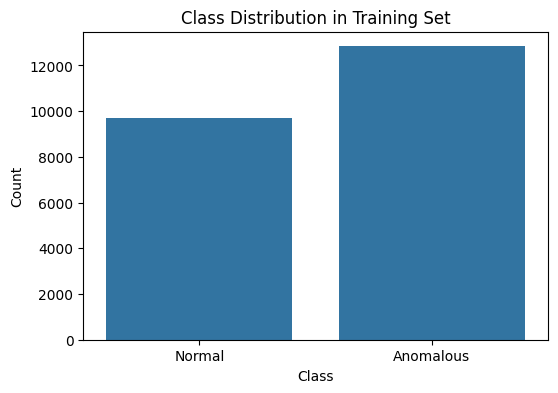

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['attack_class'])
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomalous'])
plt.show()

# Here we can see it is quite balanced Dataset

In [ ]:
# Display basic information about the dataset
data_info = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Head": df.head(),
    "Summary": df.describe(include='all'),
    "Null Values": df.isnull().sum()
}

data_info

{'Shape': (22544, 43),
 'Columns': ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_hot_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'attack_class',
  'num_learners'],
 'Head':    duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
 0         0           tcp   private  

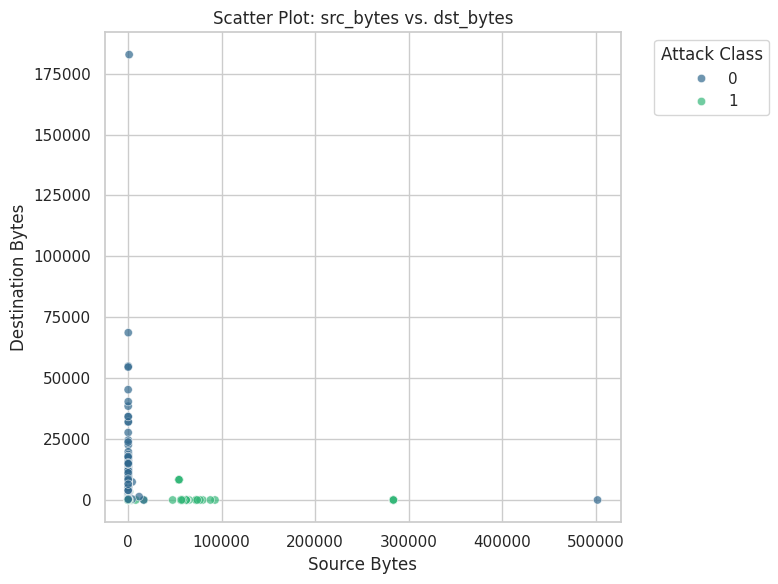

In [ ]:
# Setting a style for visualizations
sns.set(style="whitegrid")

# Sampling for faster visualization
sampled_data = df.sample(1000, random_state=42)

# 1. Scatter Plot: src_bytes vs. dst_bytes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sampled_data, x="src_bytes", y="dst_bytes", hue="attack_class", palette="viridis", alpha=0.7)
plt.title("Scatter Plot: src_bytes vs. dst_bytes")
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.legend(title="Attack Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

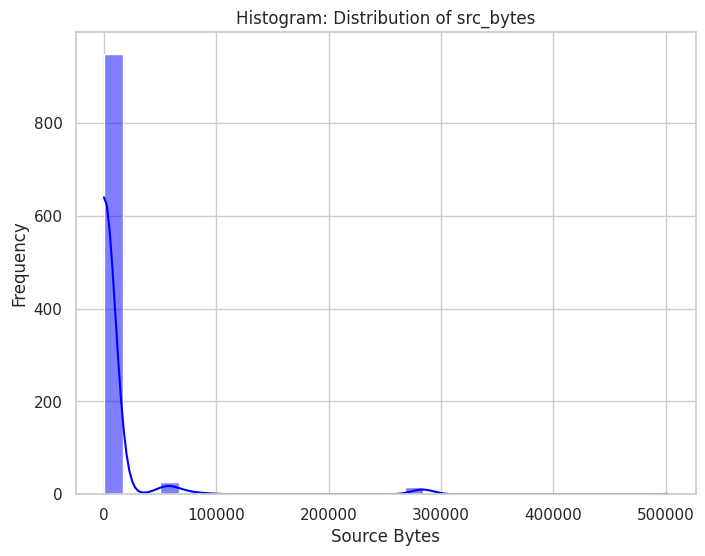

In [ ]:
# 2. Histogram: Distribution of src_bytes
plt.figure(figsize=(8, 6))
sns.histplot(data=sampled_data, x="src_bytes", bins=30, kde=True, color='blue')
plt.title("Histogram: Distribution of src_bytes")
plt.xlabel("Source Bytes")
plt.ylabel("Frequency")
plt.show()

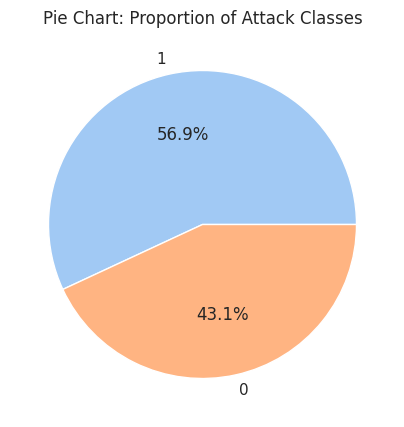

In [ ]:
# 4. Pie Chart: Proportion of Attack Classes
attack_class_counts = df["attack_class"].value_counts()
plt.figure(figsize=(5, 5))
attack_class_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel", len(attack_class_counts)))
plt.title("Pie Chart: Proportion of Attack Classes")
plt.ylabel("")
plt.show()

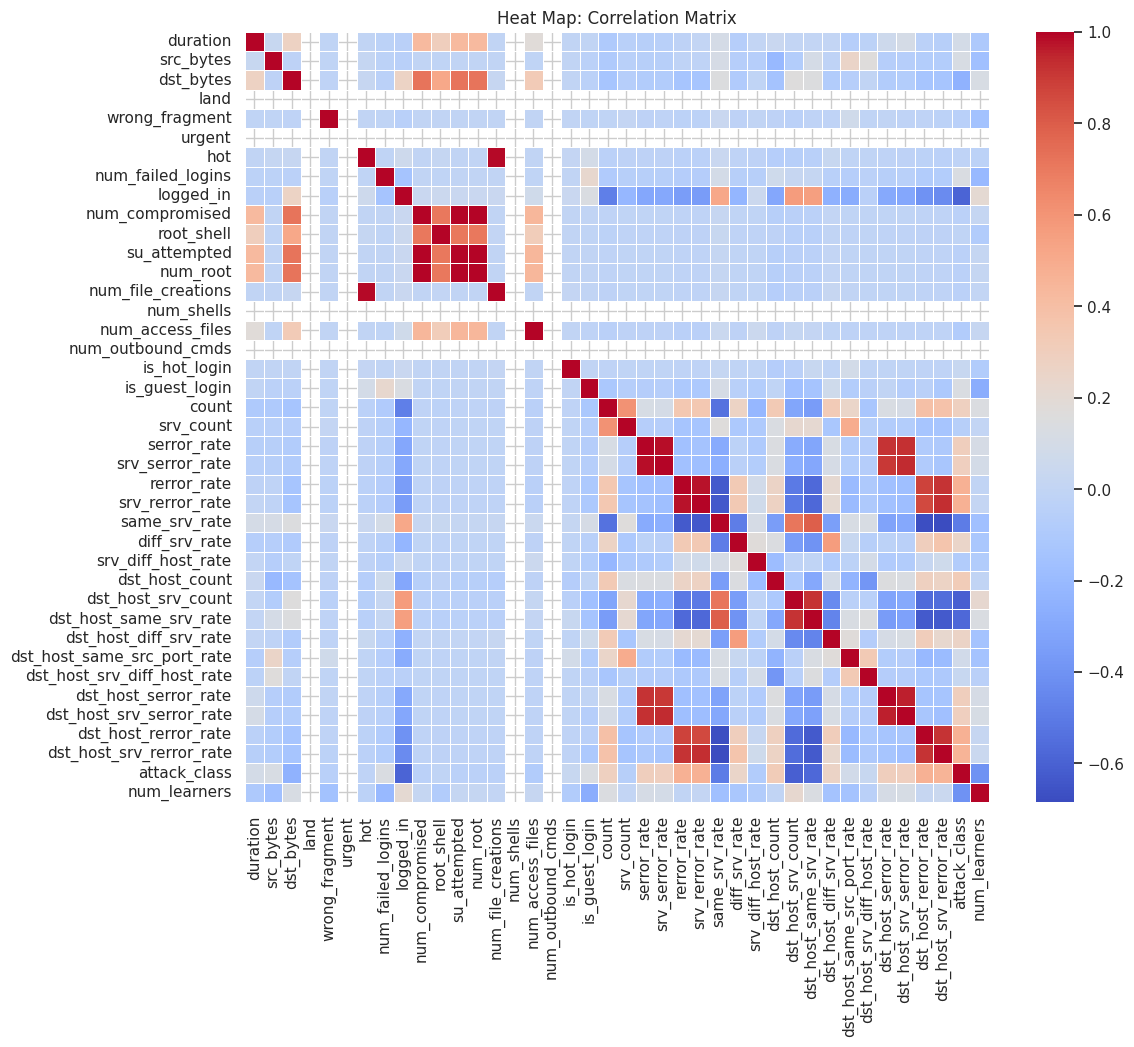

In [ ]:
# 5. Heat Map: Correlation Matrix
plt.figure(figsize=(12, 10))
# Select only numerical features for correlation calculation
numerical_data = sampled_data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Heat Map: Correlation Matrix")
plt.show()

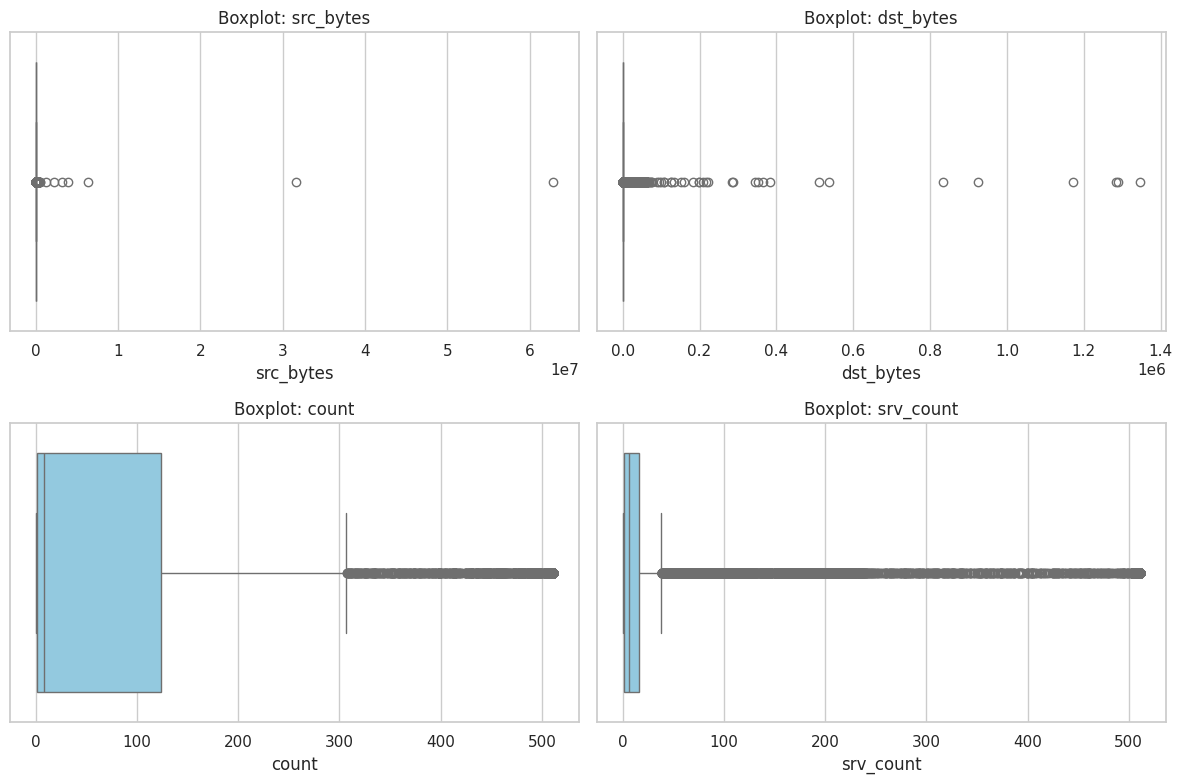

In [ ]:
# 1. Boxplots for detecting outliers in key numerical features
key_features = ["src_bytes", "dst_bytes", "count", "srv_count"]
plt.figure(figsize=(12, 8))

for i, feature in enumerate(key_features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature, color='skyblue')
    plt.title(f"Boxplot: {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


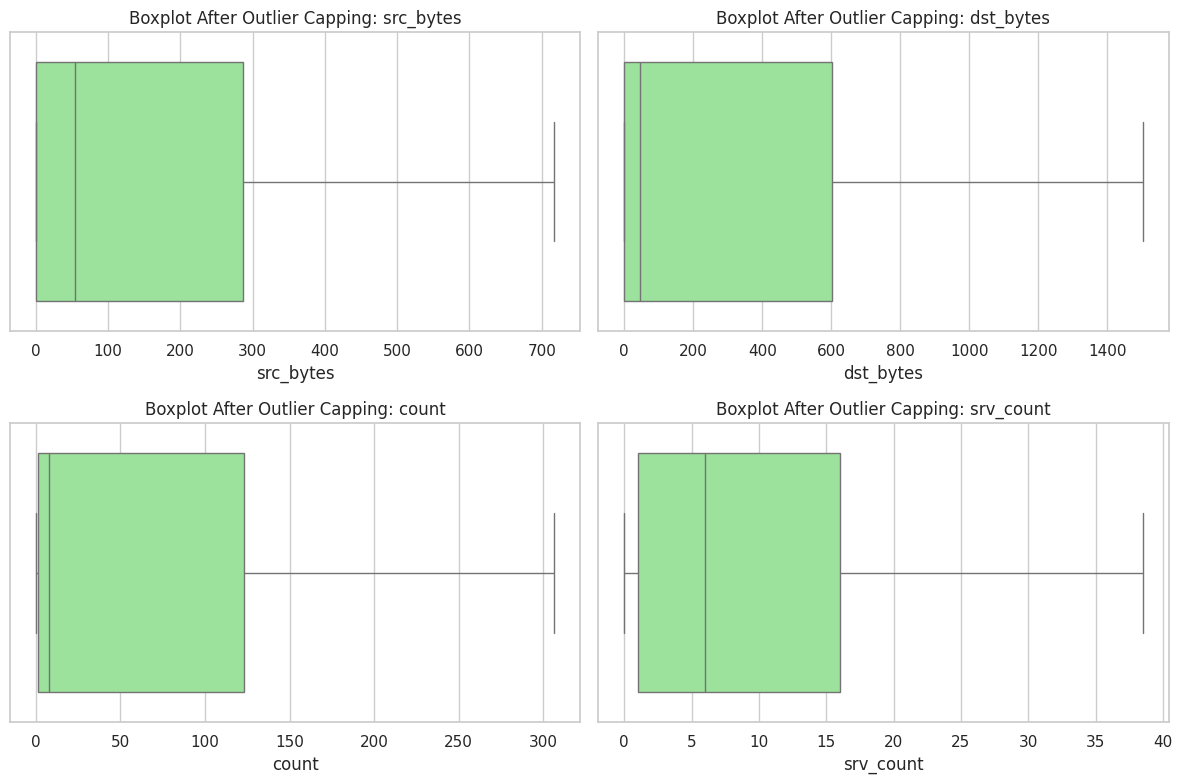

In [ ]:
# Capping outliers in the numerical features based on the interquartile range (IQR)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping to selected key features
for feature in key_features:
    data = cap_outliers(df, feature)

# Verify the results with boxplots
plt.figure(figsize=(12, 8))

for i, feature in enumerate(key_features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=feature, color='lightgreen')
    plt.title(f"Boxplot After Outlier Capping: {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class,num_learners
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,21
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,21
2,2,tcp,ftp_data,SF,717.5,0.0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0,21
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1,15
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1,11


# Let's Load Required Dependancy

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# One-hot encode the categorical columns
categorical_columns = ['protocol_type', 'service', 'flag']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows after encoding
print(df.head())


   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        0.0        0.0     0               0       0    0   
1         0        0.0        0.0     0               0       0    0   
2         2      717.5        0.0     0               0       0    0   
3         0       20.0        0.0     0               0       0    0   
4         1        0.0       15.0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_REJ  flag_RSTO  \
0                  0          0                0  ...      True      False   
1                  0          0                0  ...      True      False   
2                  0          0                0  ...     False      False   
3                  0          0                0  ...     False      False   
4                  0          0                0  ...     False       True   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0        False      Fals

In [ ]:
X = df.drop('attack_class', axis=1)
y = df['attack_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Here we Scaled The Data Using Standardization Method